<a href="https://colab.research.google.com/github/daisuke-shimizu/python-Gakushuin-programming1/blob/main/Programming1_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# サンプルプログラム実行上の注意
プログラミング上達のコツは、

- 短時間に集中してできるだけ大量のプログラムを書くこと
- 試行錯誤を行うこと
- 他人の書いた（動く）プログラムを読むこと
- 更に、自分の目的に合わせてカスタマイズしてみること

を日常的に実行することです。
しかし、限られた授業時間（予習・復習も含む）内で、これらを十分に実行することは至難です。

そこで、
この講義資料は、多数のサンプルプログラムを提供して、
少しでも不足を補うことができるように作成されています。
受講者は、以下の注意を守ってサンプルプログラムをコードセル中で実行することで、
より効率の良い学習を心がけて下さい。

1. サンプルプログラムは、コピペせず、1行1行自分でタイプして書き写して下さい。
コピペでは見逃してしまう、プログラミングの書き方の規則や、プログラミングのコツなど、
自分自身でタイプすることで気づくことができます。
2. サンプルプログラムを書き写す時は、プログラムの意味を考えるよう努めて下さい。
最初は必ずしも最良とは言えないサンプルプログラムを提示して、
後で改良した例を示すなど、この講義資料では、良いプログラムを作成する考え方を効率的に学べるよう、
いろいろな工夫をしています。
3. 意味を理解できない行がある場合には、あまり拘泥せず、先に進んでください。
100%理解しないといけないという思い込みは、プログラミングの上達にとって妨げです。
理解するための努力は必要ですが、Pythonでできることの範囲は非常に広く、
プロのプログラマでも全部は理解していないでしょう。
完璧な理解よりも、**動くプログラムを書くことを最優先の目標**として、
わからない部分は「おまじない」として受け入れることができると、上達も早くなります。
「おまじない」とは、「なぜ効くのかはわからないけれども、使い方は分かっている」という意味です。

# 第4回　リストの操作

## 前回の演習の解答例

まず、第3回の演習の解答例を示すところから始めます。

### 演習 3-1
シミュレーションでサイコロをふる回数は6で割り切れるように、600回にしてみました。
理想的には全ての目が100回ずつ出るのですが、確率事象なのでばらつきます。
何回か実行して、結果が都度違うことを確認して下さい。
```python
import matplotlib.pyplot as plt
import random as rnd
one = 0
two = 0
three = 0
four = 0
five = 0
six = 0
for _ in range(600):
  role = rnd.choice([1,2,3,4,5,6])
  if role == 1:
    one += 1
  elif role == 2:
    two += 1
  elif role == 3:
    three += 1
  elif role == 4:
    four += 1
  elif role == 5:
    five += 1
  else:
    six += 1
plt.bar(range(6), [one, two, three, four, five, six], tick_label=[1, 2, 3, 4, 5, 6])
plt.show()
```

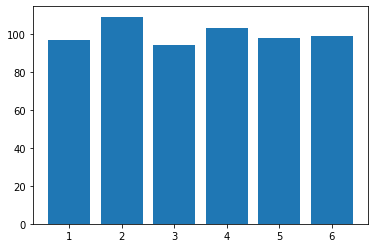

In [2]:
import matplotlib.pyplot as plt
import random as rnd
one = 0
two = 0
three = 0
four = 0
five = 0
six = 0
for _ in range(600):
  role = rnd.choice([1,2,3,4,5,6])
  if role == 1:
    one += 1
  elif role == 2:
    two += 1
  elif role == 3:
    three += 1
  elif role == 4:
    four += 1
  elif role == 5:
    five += 1
  else:
    six += 1
plt.bar(range(6), [one, two, three, four, five, six], tick_label=[1,2,3,4,5,6])
plt.show()

```python
for _ in range(600):
```
の行は、
```python
for n in range(600):
```
と変わりはありません。
本来は、0から599までの600個の数が順に`n`に代入されるのですが、この`n`はプログラムの中で一切使用されません。
名前をつける必要もないので、ダミー記号`_`を代わりに用いたものです。

### 演習 3-2
演習 3-1の解答例において、
- `one`は1の目の出現回数
- `two`は2の目の出現回数
- `three`は3の目の出現回数
- `four`は4の目の出現回数
- `five`は5の目の出現回数
- `six`は6の目の出現回数
を与えます。
従って、実験の結果をリストで表すと、`[one, two, three, four, five, six]`となります。
一方、フェアなサイコロをシミュレートできているとすると、
実験結果の理論値は`[100, 100, 100, 100, 100, 100]`と期待できます。
関数`scipy.stats.chisquare()`を使ったカイ二乗検定のやり方を思い出してもらえば、
```python
import scipy.stats
print(scipy.stats.chisquare([one, two, three, four, five, six], [100, 100, 100, 100, 100, 100]))
```
を実行して、得られる`pvalue`が、例えば、0.05より大きいことを確認できれば、
フェアなサイコロをシミュレートできると考えて良いことになります※
。
直下のコードセルでカイ二乗検定を実行して、結果を確認して下さい。

※ この表現は科学的には正確ではありません。
**サイコロがフェアではないことを示す証拠（エビデンス）はない**という表現が正確です。

In [3]:
import scipy.stats
print(scipy.stats.chisquare([one, two, three, four, five, six], [100, 100, 100, 100, 100, 100]))

Power_divergenceResult(statistic=1.4000000000000001, pvalue=0.924313272801667)


## リストの要素へのアクセス
では、この回の資料のテーマである、リストの要素へのアクセスについて見ていきます。

演習 3-1の解答例として示したプログラムは、実は、大変要領の悪いプログラムで、
もっと短く、スマートにすることができます。
そのためには、リストの操作について、学ぶ必要があります。
次のプログラムを見てください。
同じ機能を実現していますが、随分とすっきりかけていることが分かると思います。
```python
import matplotlib.pyplot as plt
import random as rnd
count = [0, 0, 0, 0, 0, 0]
for _ in range(600):
  role = rnd.choice([1,2,3,4,5,6])
  count[role - 1] += 1
plt.bar(range(6), count, tick_label=[1, 2, 3, 4, 5, 6])
plt.show()
```

[1, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 1, 1, 0]
[1, 0, 0, 2, 1, 0]
[1, 0, 0, 2, 1, 1]
[1, 0, 1, 2, 1, 1]
[2, 0, 1, 2, 1, 1]
[2, 0, 1, 2, 2, 1]
[2, 0, 2, 2, 2, 1]
[2, 0, 2, 3, 2, 1]
[2, 0, 3, 3, 2, 1]
[2, 0, 4, 3, 2, 1]
[2, 0, 4, 3, 2, 2]
[3, 0, 4, 3, 2, 2]
[3, 1, 4, 3, 2, 2]
[3, 1, 4, 3, 2, 3]
[3, 1, 4, 3, 2, 4]
[3, 2, 4, 3, 2, 4]
[3, 2, 5, 3, 2, 4]
[3, 2, 5, 3, 2, 5]
[4, 2, 5, 3, 2, 5]
[4, 2, 5, 4, 2, 5]
[4, 3, 5, 4, 2, 5]
[4, 3, 5, 4, 2, 6]
[4, 3, 5, 5, 2, 6]
[4, 3, 6, 5, 2, 6]
[4, 3, 6, 5, 2, 7]
[5, 3, 6, 5, 2, 7]
[5, 3, 6, 6, 2, 7]
[5, 3, 6, 6, 2, 8]
[5, 3, 6, 6, 3, 8]
[5, 3, 7, 6, 3, 8]
[5, 3, 8, 6, 3, 8]
[5, 3, 9, 6, 3, 8]
[5, 4, 9, 6, 3, 8]
[5, 5, 9, 6, 3, 8]
[5, 5, 9, 6, 3, 9]
[5, 5, 9, 6, 3, 10]
[5, 5, 9, 7, 3, 10]
[5, 5, 9, 7, 3, 11]
[5, 5, 9, 8, 3, 11]
[5, 5, 9, 9, 3, 11]
[5, 5, 10, 9, 3, 11]
[5, 5, 11, 9, 3, 11]
[5, 6, 11, 9, 3, 11]
[5, 6, 12, 9, 3, 11]
[5, 6, 13, 9, 3, 11]
[5, 6, 13, 9, 4, 11]
[5, 6, 13, 10, 4, 11]
[5, 6, 13, 10, 5, 11]
[6, 6, 13, 10, 5, 11]
[6, 6

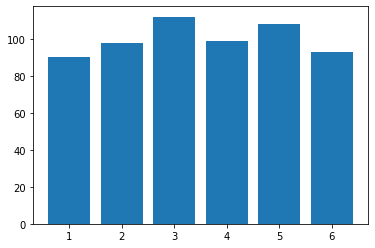

In [5]:
import matplotlib.pyplot as plt
import random as rnd
count = [0,0,0,0,0,0]
for _ in range(600):
  role = rnd.choice([1,2,3,4,5,6])
  count[role - 1] += 1
  print(count)
plt.bar(range(6), count, tick_label=[1,2,3,4,5,6])
plt.show()

リストは要素（オブジェクト）の列です。
```python
for m in ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']:
  print(m)
```
では、`m`の名前で`'January'`から`'December'`まで、順番に文字列オブジェクトの呼び出し（アクセスし）、
`m`の値を表示しています。
`for`文を使うと、**先頭から順番に要素にアクセス**します。

一方、リストの中の要素には、0から始まる番号が与えられていて、その番号で直接要素を呼び出す（アクセスする）ことができます。
**最初の要素は0番目で、1番目でない**ことに注意してください。
他のプログラミング言語ではリストを配列と呼びますが、配列の最初の要素を0番と考えるのは、
C、C++、Javaなど、多くのプログラミング言語で共通の作法です。

この番号を利用して、リスト内の要素に任意の順番でアクセスすることが可能になります。
実際、`リスト名[番号]`は、番号が指定するリストの要素を指し示します。
次のプログラムを実行して下さい。
```python
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
print(month[0])
print(month[1])
print(month[2])
print(month[3])
print(month[4])
print(month[5])
print(month[6])
print(month[7])
print(month[8])
print(month[9])
print(month[10])
print(month[11])
```

In [6]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
print(month[0])
print(month[1])
print(month[2])
print(month[3])
print(month[4])
print(month[5])
print(month[6])
print(month[7])
print(month[8])
print(month[9])
print(month[10])
print(month[11])

January
February
March
April
May
June
July
August
September
October
November
December


このプログラムは、次のプログラムとも同じです。
```python
for n in range(12):
  print(month[n])
```

In [7]:
for n in range(12):
  print(month[n])

January
February
March
April
May
June
July
August
September
October
November
December


`range(12)`が`[0,1,2,3,4,5,6,7,8,9,10.11]`と同等であることがよく分かると思います。

次の二つのプログラムを実行してみて、どのような規則で月の名前を表示するか考えてみてください。

**プログラム1**
```python
for n in [3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2]:
    print(month[n])
```
**プログラム2**
```python
for n in [3, 7, 11, 1, 0, 6, 5, 2, 4, 9, 10, 8]:
    print(month[n])
```

In [8]:
for n in [3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2]:
    print(month[n])

April
May
June
July
August
September
October
November
December
January
February
March


In [9]:
for n in [3, 7, 11, 1, 0, 6, 5, 2, 4, 9, 10, 8]:
    print(month[n])

April
August
December
February
January
July
June
March
May
October
November
September


プログラム1は、年度初めの4月から始まって年度末の3月で終わるように、月の名前を表示します。
一方、プログラム2は、ABC順で月の名前を表示します。

では、先のプログラム
```python
count = [0, 0, 0, 0, 0, 0]
for _ in range(600):
  role = rnd.choice([1,2,3,4,5,6])
  count[role-1] += 1
plt.bar(range(6), count, tick_label=[1, 2, 3, 4, 5, 6])
```
を詳細に見てみましょう。
リスト`count`は、0番から5番までの番号がふられた６つの数字オブジェクトからなり、順に、サイコロの目1〜6までが出た回数を表すカウンタです。
```python
count = [0, 0, 0, 0, 0, 0, 0]
```
では、全てのカウンタを初期値0にセットしています。
```python
for _ in range(600):
```
により、サイコロをふる回数を600回に設定しています。
```python
  role = rnd.choice([1,2,3,4,5,6])
```
ではサイコロを一回ふり、出目に`role`という名前を与えます。
リスト`count`の中の要素は0番から番号がふられますので、`role`の出目のカウンタは`count`の中で`role-1`番目の要素になります。
例えば、出目1に対応するカウンタは`count[0]`、
出目2に対応するカウンタは`count[1]`になります。
一般に、
`role`の出目のカウンタには`count[role-1]`でアクセスすることができ、
カウンタの値を1増やすためには、
```python
  count[role-1] += 1
```
を実行すれば良いことになります。

次のプログラムの実行してみて、その結果を見ればよく理解できると思います。
```python
import random as rnd
count = [0,0,0,0,0,0]

role = rnd.choice([1,2,3,4,5,6])
count[role-1] += 1
print("出目は", role, "、現在のカウントは", count)
role = rnd.choice([1,2,3,4,5,6])
count[role-1] += 1
print("出目は", role, "、現在のカウントは", count)
role = rnd.choice([1,2,3,4,5,6])
count[role-1] += 1
print("出目は", role, "、現在のカウントは", count)
role = rnd.choice([1,2,3,4,5,6])
count[role-1] += 1
print("出目は", role, "、現在のカウントは", count)
role = rnd.choice([1,2,3,4,5,6])
count[role-1] += 1
print("出目は", role, "、現在のカウントは", count)
role = rnd.choice([1,2,3,4,5,6])
count[role-1] += 1
print("出目は", role, "、現在のカウントは", count)
role = rnd.choice([1,2,3,4,5,6])
count[role-1] += 1
print("出目は", role, "、現在のカウントは", count)
role = rnd.choice([1,2,3,4,5,6])
count[role-1] += 1
print("出目は", role, "、現在のカウントは", count)
```

In [14]:
import random as rnd
count = [0,0,0,0,0,0]
 
role = rnd.choice([1,2,3,4,5,6])
count[role-1] += 1
print("出目は", role, "、現在のカウントは", count)
role = rnd.choice([1,2,3,4,5,6])
count[role-1] += 1
print("出目は", role, "、現在のカウントは", count)
role = rnd.choice([1,2,3,4,5,6])
count[role-1] += 1
print("出目は", role, "、現在のカウントは", count)
role = rnd.choice([1,2,3,4,5,6])
count[role-1] += 1
print("出目は", role, "、現在のカウントは", count)
role = rnd.choice([1,2,3,4,5,6])
count[role-1] += 1
print("出目は", role, "、現在のカウントは", count)
role = rnd.choice([1,2,3,4,5,6])
count[role-1] += 1
print("出目は", role, "、現在のカウントは", count)
role = rnd.choice([1,2,3,4,5,6])
count[role-1] += 1
print("出目は", role, "、現在のカウントは", count)
role = rnd.choice([1,2,3,4,5,6])
count[role-1] += 1
print("出目は", role, "、現在のカウントは", count)

出目は 3 、現在のカウントは [0, 0, 1, 0, 0, 0]
出目は 3 、現在のカウントは [0, 0, 2, 0, 0, 0]
出目は 2 、現在のカウントは [0, 1, 2, 0, 0, 0]
出目は 6 、現在のカウントは [0, 1, 2, 0, 0, 1]
出目は 2 、現在のカウントは [0, 2, 2, 0, 0, 1]
出目は 4 、現在のカウントは [0, 2, 2, 1, 0, 1]
出目は 6 、現在のカウントは [0, 2, 2, 1, 0, 2]
出目は 6 、現在のカウントは [0, 2, 2, 1, 0, 3]


```python
plt.bar(range(6), count, tick_label=[1, 2, 3, 4, 5, 6])
```
は出目の回数を棒グラフ（bar graph、ヒストグラム）で描画するコードです。

## リストの長さ（要素の個数）

**`len()`が、リストに含まれる要素の個数（長さ）を返す関数**であることを覚えましょう。
`month`は12個の要素を含みますので、
`range(len(month))`は`range(12)`と同じです。
```python
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
print("monthの要素数は", len(month))
for n in range(len(month)):
  print("month[", n, "] = ", month[n])
```

In [16]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
print('monthの要素数は', len(month))
for n in range(len(month)):
  print("month[", n, "] = ", month[n])

monthの要素数は 12
month[ 0 ] =  January
month[ 1 ] =  February
month[ 2 ] =  March
month[ 3 ] =  April
month[ 4 ] =  May
month[ 5 ] =  June
month[ 6 ] =  July
month[ 7 ] =  August
month[ 8 ] =  September
month[ 9 ] =  October
month[ 10 ] =  November
month[ 11 ] =  December


## 部分の取得（スライス）
Pythonでは、リストの一部分を簡単に取り出すことができます。
このやり方を**スライス**と呼びますが、非常に便利な機能で、Pythonの特長の一つといっても良いでしょう。

次のサンプルプログラムを実行すると、理解が早いと思います。
```python
print("month[2] = ", month[2])
print("month[10] = ", month[10])
print("month[2:10] = ", month[2:10])
print("month[2:] = ", month[2:])
print("month[:10] = ", month[:10])
print("month[2:10:2] = ", month[2:10:2])
print("month[2:10:3] = ", month[2:10:3])
```
* `month[a:b]`は、$a$番目から$b-1$番目の要素までからなる部分リストを取り出します。
* $b$が省略される時、`month[a:]`は、$a$番目から最後の要素までからなる部分リストを取り出します。
* $a$が省略される時、`month[:b]`は、先頭から$b$番目の要素までからなる部分リストを取り出します。
* `month[a:b:c]`は、取り出す要素を$c$個刻みにします。


In [20]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
print("month[2] = ", month[2])
print("month[10] = ", month[10])
print("month[2:10] = ", month[2:10])
print("month[2:] = ", month[2:])
print("month[:10] = ", month[:10])
print("month[2:10:2] = ", month[2:10:2])
print("month[2:10:3] = ", month[2:10:3])

month[2] =  March
month[10] =  November
month[2:10] =  ['March', 'April', 'May', 'June', 'July', 'August', 'September', 'October']
month[2:] =  ['March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month[:10] =  ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October']
month[2:10:2] =  ['March', 'May', 'July', 'September']
month[2:10:3] =  ['March', 'June', 'September']


## リストの最後の要素へのアクセス

リストの先頭の要素にアクセスするには、`リスト名[0]`で良いですが、最後の要素にアクセスするには、`リスト名[リストの要素数-1]`になります。
1を引かなければならないのは、リストの要素の番号は０から始まるので、最後の要素の番号は「リストの要素数ー１」になるからです。
```python
print(month[0])
print(month[len(month)-1])
```

In [21]:
print(month[0])
print(month[len(month)-1])

January
December


リストの最後の要素にアクセスしなければならない場面は頻繁にありますので、
その度に、いちいち`month(len(month)-1]`などと書くのは面倒です。
Pythonでは、`リスト名[-1]`で最後の要素にアクセスする簡便な手段を提供しています。
```python
print(month[-1])
print(month[-2])
```

In [25]:
print(month[-1])
print(month[-12])
print(month[-3])

December
January
October


次のプログラムのプログラムを実行する前に、コードを読んで、その動作を予想してください。
```python
for n in range(len(month)):
  print("month[", -n-1, "] = ", month[-n-1])
```

In [27]:
for n in range(len(month)):
  print("month[", -n-1, "] = ", month[-n-1])

month[ -1 ] =  December
month[ -2 ] =  November
month[ -3 ] =  October
month[ -4 ] =  September
month[ -5 ] =  August
month[ -6 ] =  July
month[ -7 ] =  June
month[ -8 ] =  May
month[ -9 ] =  April
month[ -10 ] =  March
month[ -11 ] =  February
month[ -12 ] =  January


予想はあたりましたか？

`for n in range(len(month))`の最初の`n`の値は０です。
ですので、最初に`print(month[-1])`が実行されます。
`n`の次の値は1ですので、二番目に`print(month[-2])`が実行されます。
頭の中で思考実験的にプログラムを実行してみて、プログラムの動作を理解することは、良い訓練になります。

## 要素の並べ替え

リストの要素を逆順に並べ替えるには、`reversed()`という関数を使うことができます。
```python
print(list(reversed(month)))
```

In [28]:
print(list(reversed(month)))

['December', 'November', 'October', 'September', 'August', 'July', 'June', 'May', 'April', 'March', 'February', 'January']


`reversed(month)`は、`month`の１２個の要素を逆順に並べ替えますが、並べ替えた結果はリストではなく、イテレータ（iterator）という種類のオブジェクトになります。
イテレータの機能については、ちょっと高度な内容なので、ここでは触れませんが、今のところ、リストと大体同等と思っておいていただいて問題ありません。イテレータは`list()`関数を使うとリストに変換することができます。

次のプログラムを実行してみてください。
```python
print("# reversed(month)はイテレータ（iterator）で、リストではありません。")
print("# print(reversed(month))の実行結果：")
print(reversed(month))
print() #空行を挿入します

print("# list(reversed(month))でリストに変換されます。")
print("# print(list(reversed(month)))の実行結果：")
print(list(reversed(month)))
print()

print("reversed(month)を実行しても、元のmonthには変更はありません。")
print("# print(month)の実行結果：")
print(month)
print()

print("# for文の中ではイテレータもリストも同じ機能を果たします。")
print("# for m in reversed(month):")
print("#    print(m)")
print("# の実行結果：")
for m in reversed(month):
  print(m)
print()

print("# list(reversed(month))としても同じです。")
print("# for m in list(reversed(month)):")
print("#    print(m)")
print("# の実行結果：")
for m in list(reversed(month)):
  print(m)
print()

print("# range()もリストと同等でも、厳密にはリストではないことを以前にみました。")
print("# print(range(12))の実行結果：")
print(range(12))
print()

print("# list(range(12))で、リストに変換することができる点も、同じでした。")
print("# print(list(range(12)))の実行結果：")
print(list(range(12)))
```

In [29]:
print("# reversed(month)はイテレータ（iterator）で、リストではありません。")
print("# print(reversed(month))の実行結果：")
print(reversed(month))
print() #空行を挿入します
 
print("# list(reversed(month))でリストに変換されます。")
print("# print(list(reversed(month)))の実行結果：")
print(list(reversed(month)))
print()
 
print("reversed(month)を実行しても、元のmonthには変更はありません。")
print("# print(month)の実行結果：")
print(month)
print()
 
print("# for文の中ではイテレータもリストも同じ機能を果たします。")
print("# for m in reversed(month):")
print("#    print(m)")
print("# の実行結果：")
for m in reversed(month):
  print(m)
print()
 
print("# list(reversed(month))としても同じです。")
print("# for m in list(reversed(month)):")
print("#    print(m)")
print("# の実行結果：")
for m in list(reversed(month)):
  print(m)
print()
 
print("# range()もリストと同等でも、厳密にはリストではないことを以前にみました。")
print("# print(range(12))の実行結果：")
print(range(12))
print()
 
print("# list(range(12))で、リストに変換することができる点も、同じでした。")
print("# print(list(range(12)))の実行結果：")
print(list(range(12)))

# reversed(month)はイテレータ（iterator）で、リストではありません。
# print(reversed(month))の実行結果：

# list(reversed(month))でリストに変換されます。
# print(list(reversed(month)))の実行結果：
['December', 'November', 'October', 'September', 'August', 'July', 'June', 'May', 'April', 'March', 'February', 'January']

reversed(month)を実行しても、元のmonthには変更はありません。
# print(month)の実行結果：
['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# for文の中ではイテレータもリストも同じ機能を果たします。
# for m in reversed(month):
#    print(m)
# の実行結果：
December
November
October
September
August
July
June
May
April
March
February
January

# list(reversed(month))としても同じです。
# for m in list(reversed(month)):
#    print(m)
# の実行結果：
December
November
October
September
August
July
June
May
April
March
February
January

# range()もリストと同等でも、厳密にはリストではないことを以前にみました。
# print(range(12))の実行結果：
range(0, 12)

# list(range(12))で、リストに変換することができる点も、同じでした。
# print(list(range(12)))の実行結果：
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1

関数`sorted()`を使うと、リストの要素をソートすることもできます。
```python
print(sorted(month))
```

In [30]:
print(sorted(month))

['April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September']


当然、数字からなるリストもソートできます。
```python
digits = [rnd.choice(range(10)) for _ in range(20)]
print(digits)
print(sorted(digits))
```

In [41]:
digits = [rnd.choice(range(10)) for _ in range(20)]
print(digits)
print(sorted(digits))

[3, 7, 2, 0, 7, 8, 0, 5, 1, 0, 7, 5, 9, 4, 6, 9, 6, 6, 9, 4]
[0, 0, 0, 1, 2, 3, 4, 4, 5, 5, 6, 6, 6, 7, 7, 7, 8, 9, 9, 9]


## 要素の追加
前回の授業でも学びましたが、リストに要素を追加するには`append()`関数を使います。
appendとは、「末尾に追加する」という意味です。
```python
names = []
names.append("Alice")
print(names)
names.append("Bob")
print(names)
names.append("Charlie")
print(names)
```

In [42]:
names = []
names.append("Alice")
print(names)
names.append("Bob")
print(names)
names.append("Chalie")
print(names)

['Alice']
['Alice', 'Bob']
['Alice', 'Bob', 'Chalie']


リスト`names`を逆順に並べ替える`reversed(names)`、
リスト`names`の末尾に`Alice`を追加する`names.append("Alice")`、
どちらもリスト`names`に関数`reversed()`、`append()`を適用していますが、記法が違います。
厳密には、後者はオブジェクト指向の用語で「メソッドを投げる」と言って区別しますが、その違いは分かりにくいと思います。
実は、「関数」の実装の仕方が違いの原因なので、理由は一般ユーザにとってはあまり重要ではありません。
しかし、どちらの記法で関数を適用するのかは、
関数ごとにわかっていなければなりません。

このように、一貫性が微妙なあたりが、Pythonの欠点の一つともいえます。
特定の関数がどちらの呼び出し方をするか、全部覚えていられないので、自作のプログラムで利用する時は、両方試してみるか、ネット検索で調べるかして下さい。
実は、**「自分で試してみる」、「ネットで調べる」習慣をつけることはプログラミングが上達する秘訣**ですので、その点では無駄な労力ではありません。


## 要素の所属の判定
前にも一度みましたが、特定の要素がリストに含まれるか否かは、`要素 in リスト名`の形の論理式で判定することができます。
要素がリストに含まれていれば真（True）、含まれていなければ偽(False)が値になります。
```python
names = ["Alice", "Bob", "Charlie"]
print('現在の名前リストは', names)
print("Alice" in names)
print("David" in names)
if "David" in names:
    print('Davidが含まれているので、Eveを追加')
    names.append("Eve")
else:
    print('Davidが含まれていないので、Davidを追加')
    names.append("David")
print('現在の名前リストは', names)
if "David" in names:
    print('Davidが含まれているので、Eveを追加')
    names.append("Eve")
else:
    print('Davidが含まれていないので、Davidを追加')
    names.append("David")
print('現在の名前リストは', names)
```

In [45]:
names = ["Alice", "Bob", "Charlie"]
print('現在の名前リストは', names)
print("Alice" in names)
print("David" in names)

if "David" in names:
  print('Davidが含まれているので、Eveを追加')
  names.append("Eve")
else:
  print('Davidが含まれていないので、Davidを追加')
  names.append("David")
print('現在の名前リストは', names)

if "David" in names:
  print('Davidが含まれているので、Eveを追加')
  names.append("Eve")
else:
  print('Davidが含まれていないので、Davidを追加')
  names.append("David")
print('現在の名前リストは', names)

現在の名前リストは ['Alice', 'Bob', 'Charlie']
True
False
Davidが含まれていないので、Davidを追加
現在の名前リストは ['Alice', 'Bob', 'Charlie', 'David']
Davidが含まれているので、Eveを追加
現在の名前リストは ['Alice', 'Bob', 'Charlie', 'David', 'Eve']


リストには他にもいろいろな機能があります。
例えば、「Python　リスト」をキーワードにして、インターネットで検索してみてください。
サンプルプログラム付きで多くの記事が見つかると思います。

Python自身は他の言語に比べると仕様が小さい（機能が少ない）ですが、ライブラリも含めると、利用できる機能は膨大です。
到底覚え切れるものではないし、覚えようとするのはエネルギーの無駄です。
**基本を理解して、具体的な機能はインターネットで検索して使い方を調べる**のが、賢い方法です。

以下にリストの便利な機能をいくつかサンプルプログラムで示します。
```python
digits = list(range(10))
print(min(digits))
print(max(digits))
print(sum(digits))

import statistics as stats #statisticsは統計を扱うライブラリ
print(stats.mean(digits)) #平均
print(stats.variance(digits)) #分散
print(stats.stdev(digits)) #標準偏差
```

In [49]:
digits = list(range(10))
print(digits)
print(min(digits))
print(max(digits))
print(sum(digits))
print('\n')
 
import statistics as stats
print(stats.mean(digits)) #平均
print(stats.variance(digits)) #分散
print(stats.stdev(digits)) #標準偏差

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
0
9
45


4.5
9.166666666666666
3.0276503540974917


最後に**文字列を文字のリスト**とみなすことができることを見ます。

## 文字列
実は、文字列オブジェクトは、文字のリストとみなすことができます。
次の5つのプログラムを実行してみてください。

**プログラム1**
```python
a = "April"
print(len(a))
```
**プログラム2**
```python
for n in range(len(a)):
  print(a[n])
```
**プログラム3**
```python
for c in a:
  print(c)
```
**プログラム4**
```python
print(sorted(a))
```
**プログラム5**
```python
print(list(reversed(a)))
```

In [51]:
a = "April"
print(len(a))

5


In [52]:
for n in range(len(a)):
  print(a[n])

A
p
r
i
l


In [53]:
for c in a:
  print(c)

A
p
r
i
l


In [54]:
print(sorted(a))

['A', 'i', 'l', 'p', 'r']


In [55]:
print(list(reversed(a)))

['l', 'i', 'r', 'p', 'A']


その他にも文字列に適用できるリストの機能はありますが、実行結果は文字列ではなくリストになるものもあります。
また、使えない機能もありますので、使うときには試して見てください。


## プログラミング1：第4回演習
### 演習 4-1
欧米では「名前に'r'が含まれない月には牡蠣は食べるな」という。
牡蠣の産卵期で脂肪分が落ちておいしくないことが理由である。
以下のプログラムを完成させて、「牡蠣を食べてはいけない月」と「牡蠣を食べても良い月」を表示せよ。
```python
# 演習の解答
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
cannot_eat_oister = []
can_eat_oister = []
# 以下にプログラムを書き加えよ

# ここまで
print("牡蠣を食べてはいけない月は")
print(cannot_eat_oister)
print("牡蠣を食ても良い月は")
print(can_eat_oister)
```

In [58]:
# 演習の解答
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
cannot_eat_oister = []
can_eat_oister = []
# 以下にプログラムを書き加えよ

for m in month:
  if('r' in m.lower()):
    cannot_eat_oister.append(m)
  else:
    can_eat_oister.append(m)
 
# ここまで
print("牡蠣を食べてはいけない月は")
print(cannot_eat_oister)
print("牡蠣を食ても良い月は")
print(can_eat_oister)

牡蠣を食べてはいけない月は
['January', 'February', 'March', 'April', 'September', 'October', 'November', 'December']
牡蠣を食ても良い月は
['May', 'June', 'July', 'August']


### 演習 4-2
英語では、月名の先頭3文字をとって、省略形とする。例えば、Januaryの省略形は、Janである。
```python
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
```
から、省略形のリスト
```python
month_abbr = ['Jan', ... ]
```
を生成するプログラムを、内包表現を用いて作成せよ。

In [61]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_abbr = []

for m in month:
  shortened_word = m[:3]
  month_abbr.append(shortened_word)
print(month_abbr)

['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
